# COVID Graphs

The following notebook contains graphs for the isrealie health dataset.
- Over time
- Total
- Grouped by Gender and Age

In [4]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load Data from ZIP
covid_0220_df = pd.read_csv('./data/corona_tested_individuals_ver_00220.english.zip', compression = 'zip')

C:\Users\ahegarty\.conda\envs\DataScienceMsc\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
# Map data to int values
covid_mapping = {
    'negative':0,
    'positive':1,
    'other':np.nan
}

covid_0220_df['corona_result_clean'] = covid_0220_df['corona_result'].map(covid_mapping)

covid_0220_df["age_60_and_above"] = covid_0220_df["age_60_and_above"].map({"No": 0, "Yes": 1})
covid_0220_df["gender"] = covid_0220_df["gender"].map({"female": 1, "male": 0})
covid_0220_df["contact"] = covid_0220_df["test_indication"].map({"Contact with confirmed": 1, "Abroad": 0,  "Other": 0})

In [7]:
covid_0220_df['test_date'] = pd.to_datetime(covid_0220_df['test_date'])

In [28]:
covid_0220_df['test_date_month'] = pd.to_datetime(covid_0220_df['test_date'].to_numpy().astype('datetime64[M]'))

# Graphs over time

In [16]:
grouped_by_date_count = covid_0220_df.groupby(['test_date', 'corona_result']).count()
grouped_by_date_mean = covid_0220_df.groupby(['test_date', 'corona_result']).mean()
grouped_by_date_results = covid_0220_df.groupby(['test_date']).mean()

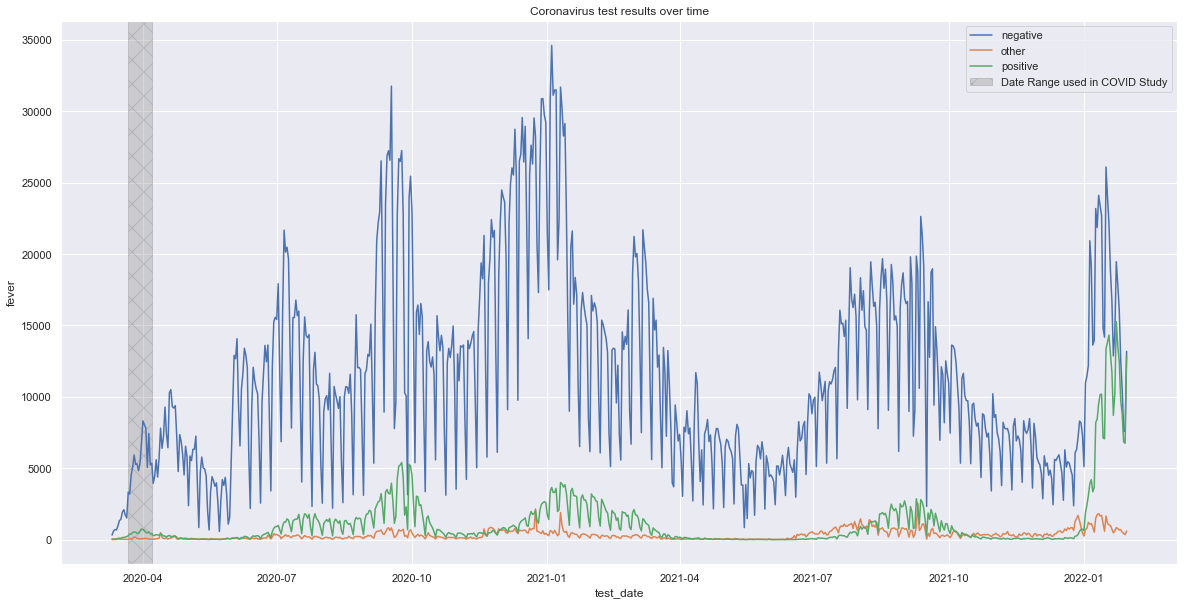

In [17]:
#define figure size
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data = grouped_by_date_count, x = 'test_date', y ='fever',  hue = 'corona_result')
plt.axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
plt.title('Coronavirus test results over time')
plt.legend()

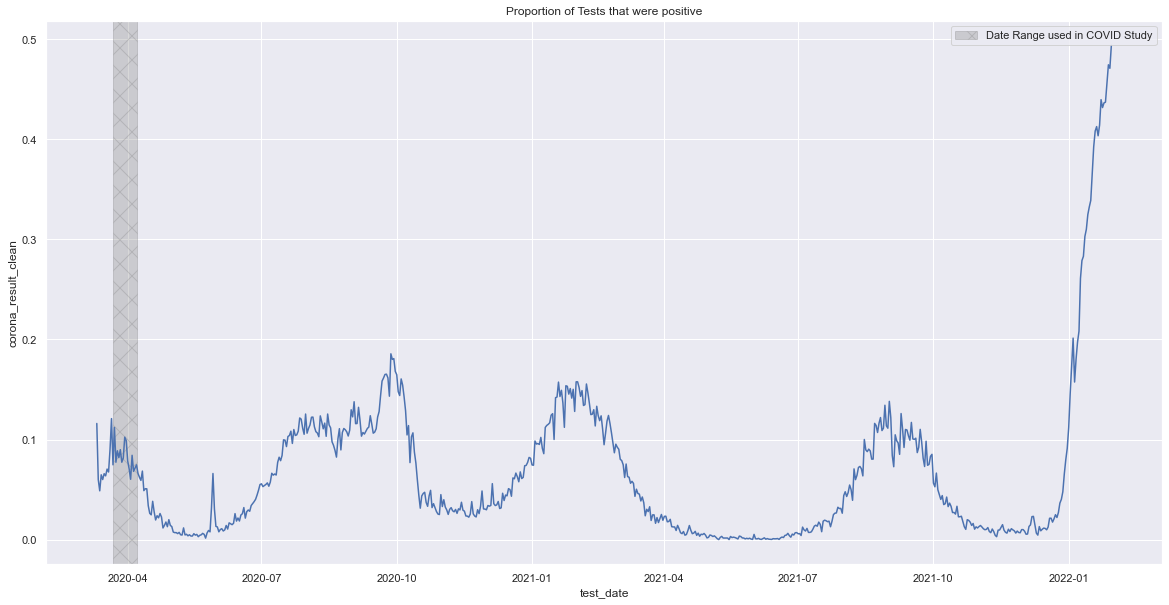

In [18]:
#define figure size
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data = grouped_by_date_results, x = 'test_date', y ='corona_result_clean')
plt.axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
plt.title('Proportion of Tests that were positive')
plt.legend()

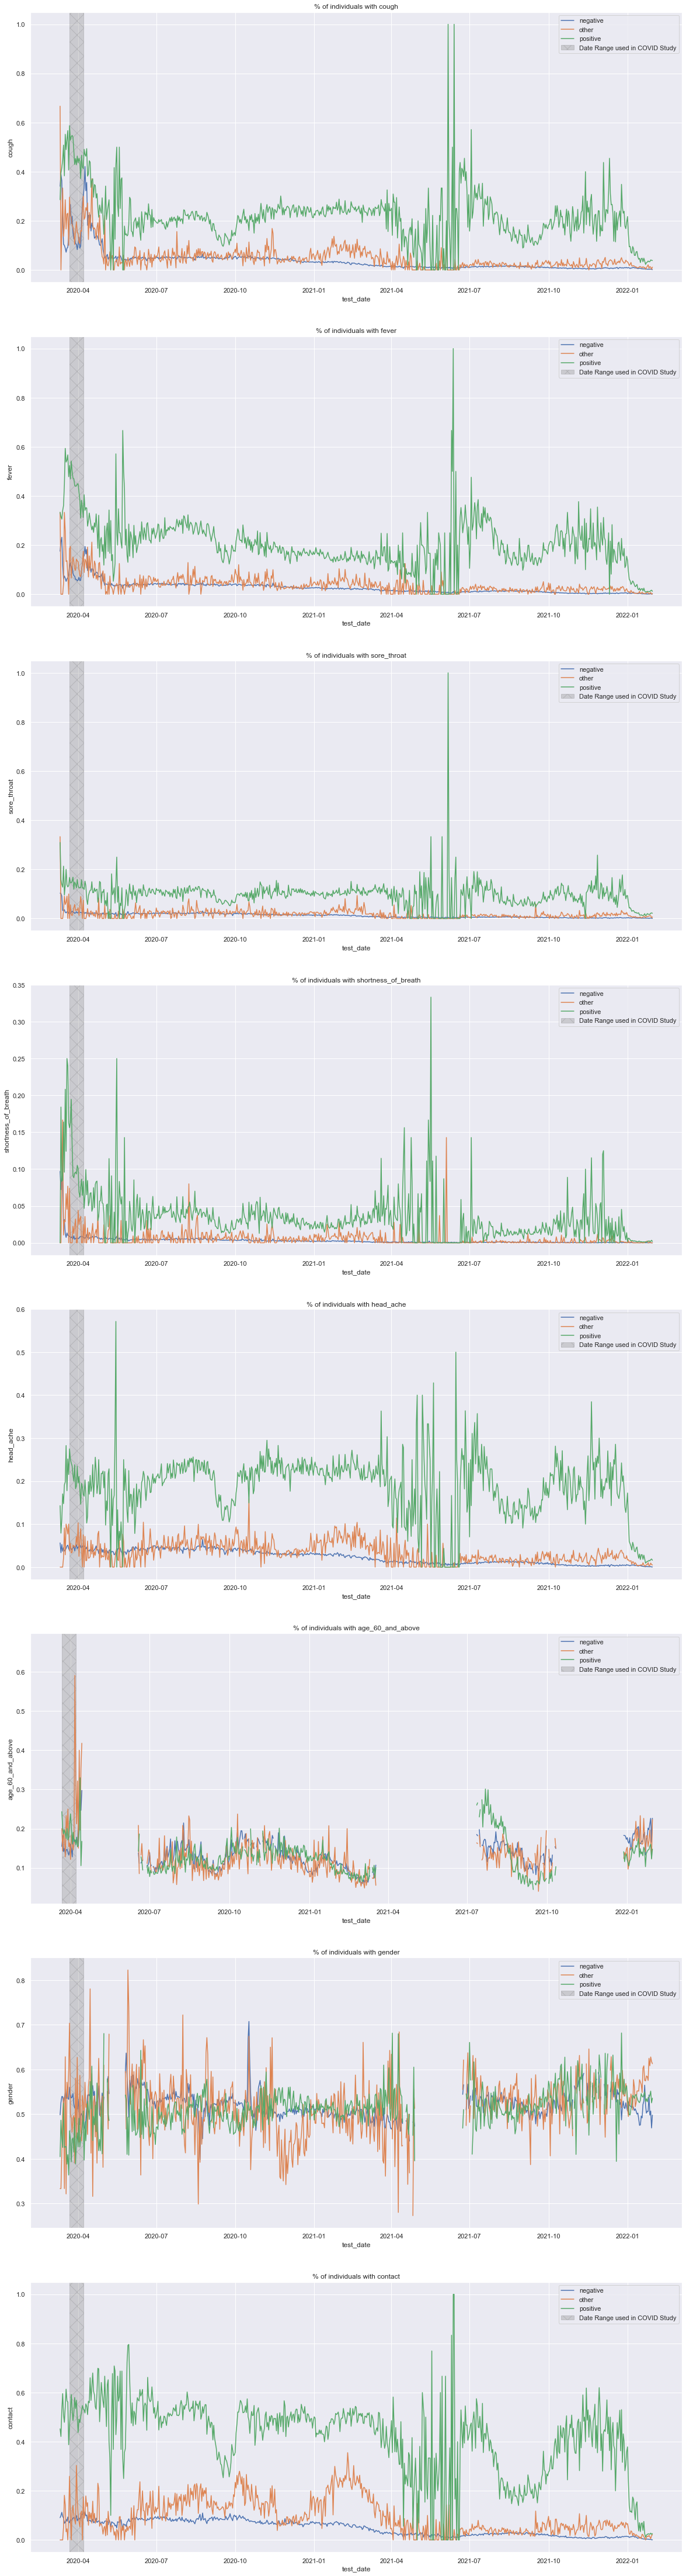

In [19]:
feature_list = [
    'cough',
    'fever',	
    'sore_throat',
    'shortness_of_breath',	
    'head_ache',
    'age_60_and_above',
    'gender',
    'contact'
]

fig, ax = plt.subplots(nrows = len(feature_list), figsize = (20, 10*len(feature_list)))

for i, feature in zip(range(0, len(feature_list)),feature_list):
    sns.lineplot(data = grouped_by_date_mean, x = 'test_date', y = feature,  hue = 'corona_result', ax = ax[i])
    ax[i].set_title(f'% of individuals with {feature}')
    ax[i].axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
    ax[i].legend()

# Graphs over time by month

In [27]:
grouped_by_month_count = covid_0220_df.groupby(['test_date_month', 'corona_result']).count()
grouped_by_month_mean = covid_0220_df.groupby(['test_date_month', 'corona_result']).mean()
grouped_by_month_results = covid_0220_df.groupby(['test_date_month']).mean()

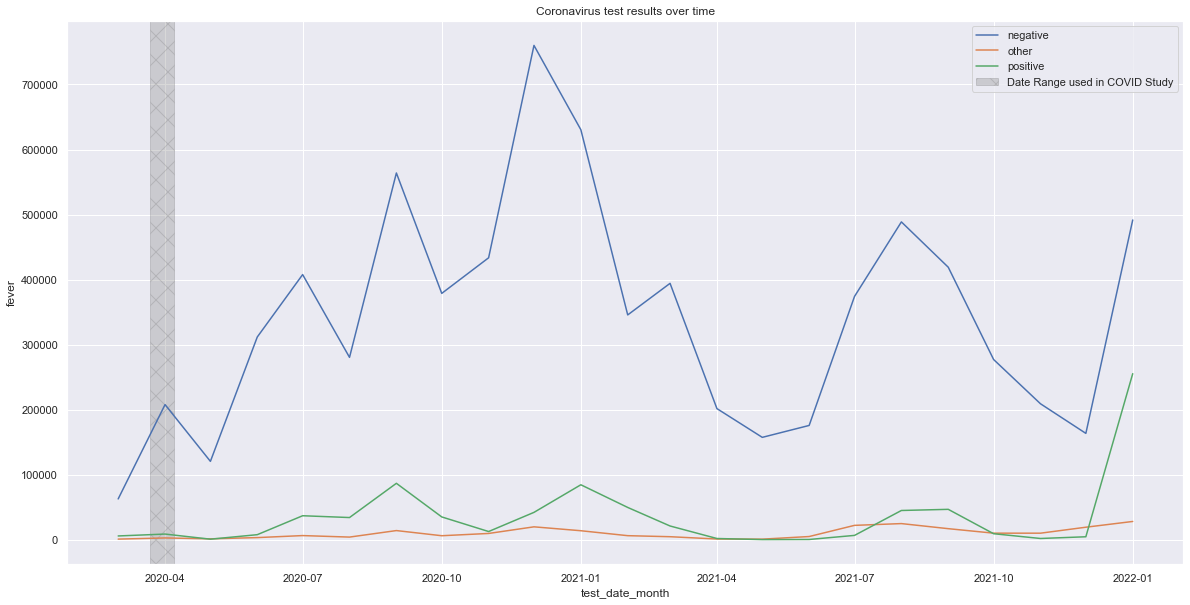

In [30]:
#define figure size
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data = grouped_by_month_count, x = 'test_date_month', y ='fever',  hue = 'corona_result')
plt.axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
plt.title('Coronavirus test results over time')
plt.legend()

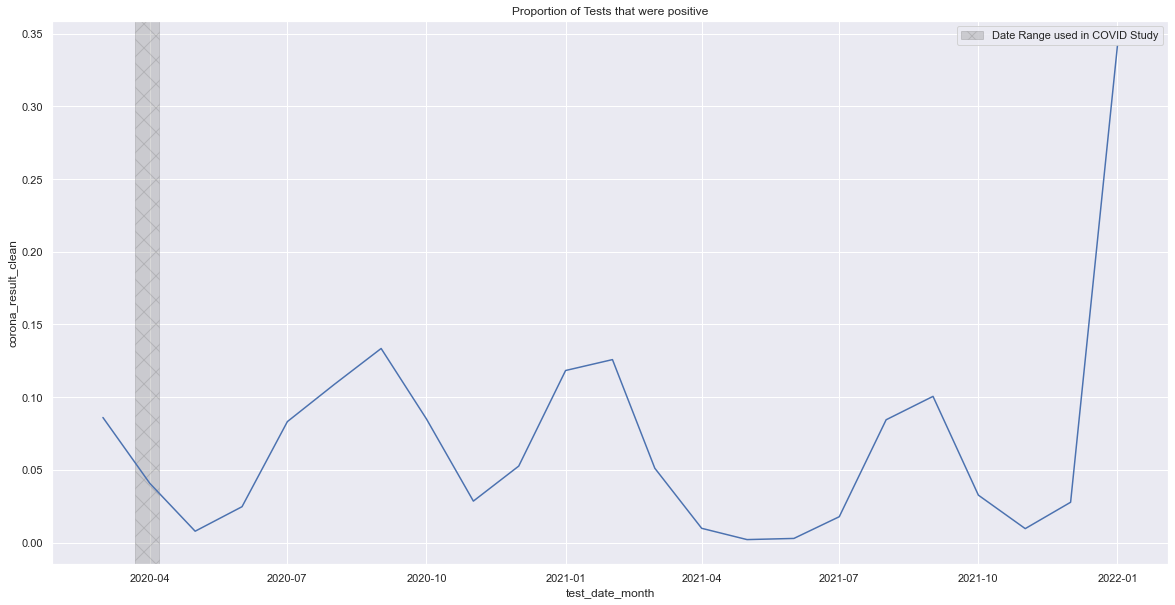

In [31]:
#define figure size
sns.set(rc={"figure.figsize":(20, 10)})
sns.lineplot(data = grouped_by_month_results, x = 'test_date_month', y ='corona_result_clean')
plt.axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
plt.title('Proportion of Tests that were positive')
plt.legend()

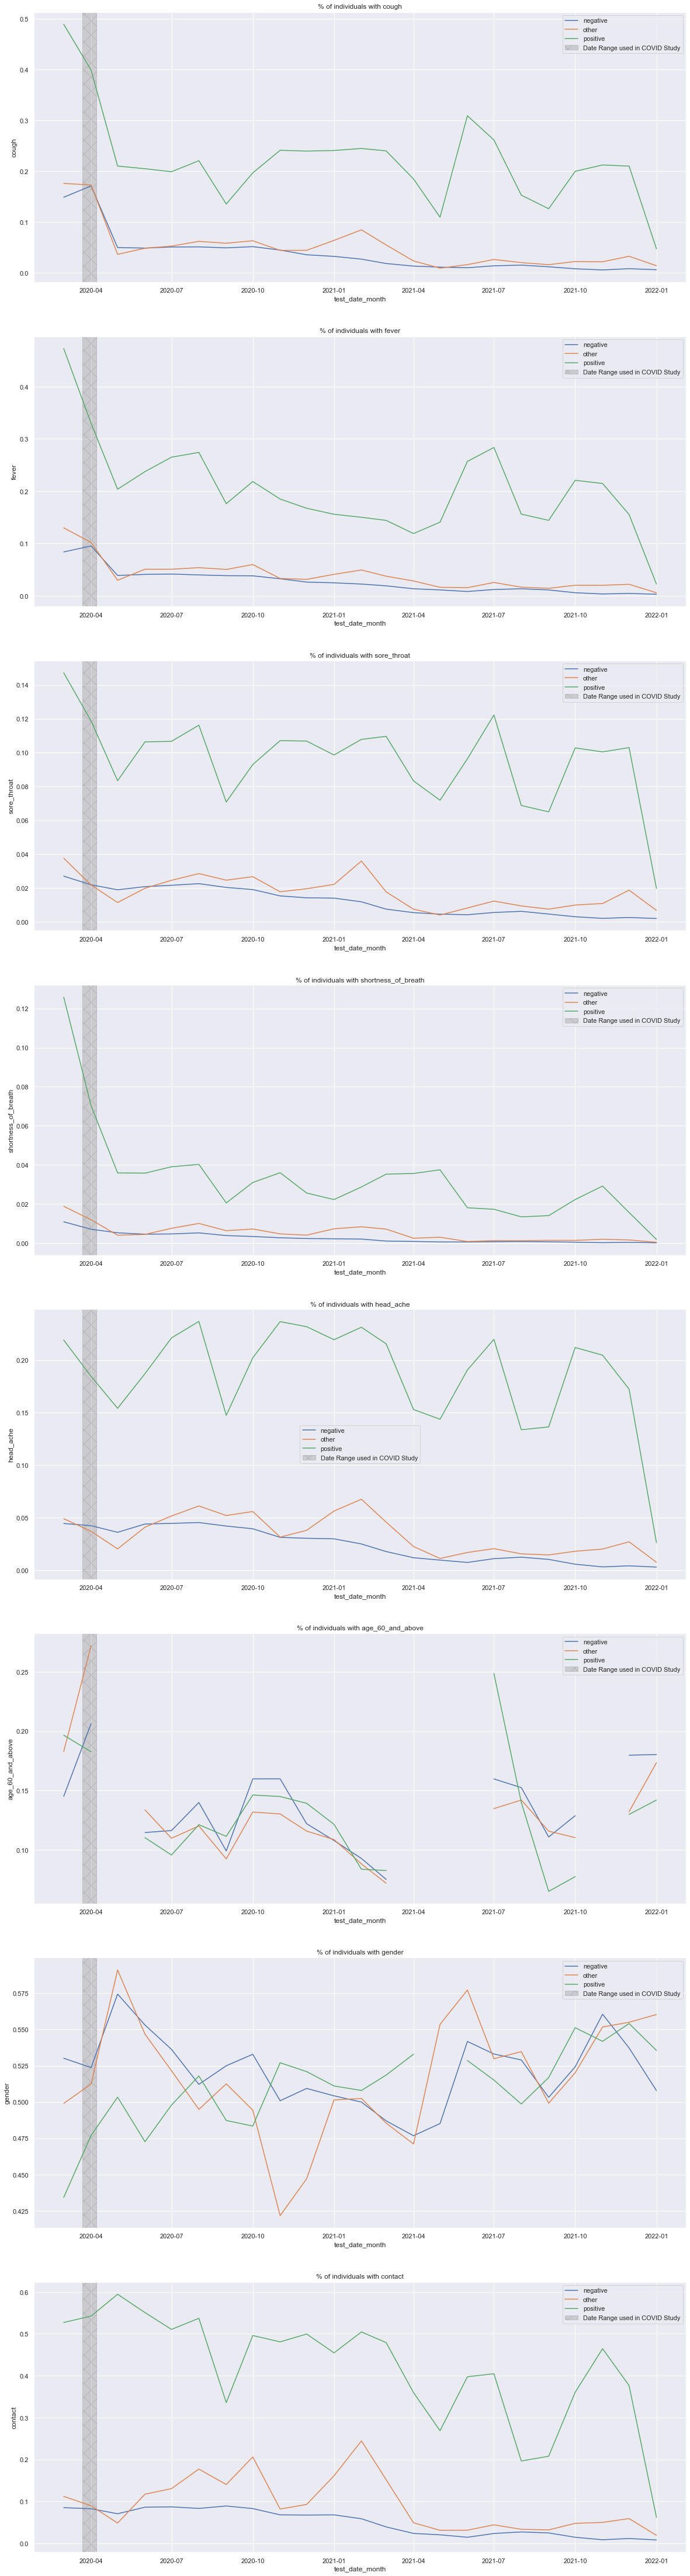

In [32]:
feature_list = [
    'cough',
    'fever',	
    'sore_throat',
    'shortness_of_breath',	
    'head_ache',
    'age_60_and_above',
    'gender',
    'contact'
]

fig, ax = plt.subplots(nrows = len(feature_list), figsize = (20, 10*len(feature_list)))

for i, feature in zip(range(0, len(feature_list)),feature_list):
    sns.lineplot(data = grouped_by_month_mean, x = 'test_date_month', y = feature,  hue = 'corona_result', ax = ax[i])
    ax[i].set_title(f'% of individuals with {feature}')
    ax[i].axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
    ax[i].legend()

# Graphs by Gender and Result

In [41]:
grouped_by_gender_count = covid_0220_df.groupby(['gender', 'corona_result']).count().reset_index()
grouped_by_gender_mean = covid_0220_df.groupby(['gender', 'corona_result']).mean().reset_index()
grouped_by_gender_results = covid_0220_df.groupby(['gender']).mean().reset_index()

In [34]:
grouped_by_gender_count

test_date    cough    fever  sore_throat  \
gender corona_result                                             
0.0    negative         3489332  3489332  3489332      3489332   
       other             102020   102020   102020       102020   
       positive          381547   381547   381547       381547   
1.0    negative         3740886  3740886  3740886      3740886   
       other             108181   108181   108181       108181   
       positive          404427   404427   404427       404427   

                      shortness_of_breath  head_ache  age_60_and_above  \
gender corona_result                                                     
0.0    negative                   3489332    3489332           2819898   
       other                       102020     102020             81009   
       positive                    381547     381547            365868   
1.0    negative                   3740886    3740886           2993794   
       other                       108181     108181             83940   
       positive                    404427     404427            387318   

                      test_indication  corona_result_clean  contact  \
gender corona_result                                                  
0.0    negative               3489332              3489332  3489332   
       other                   102020                    0   102020   
       positive                381547               381547   381547   
1.0    negative               3740886              3740886  3740886   
       other                   108181                    0   108181   
       positive                404427               404427   404427   

                      test_date_month  
gender corona_result                   
0.0    negative               3489332  
       other                   102020  
       positive                381547  
1.0    negative               3740886  
       other                   108181  
       positive                404427

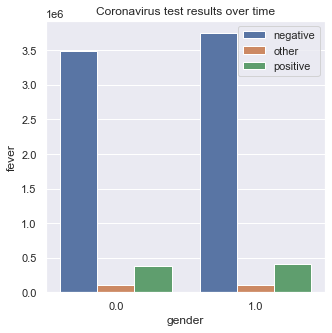

In [61]:
#define figure size
sns.set(rc={"figure.figsize":(5, 5)})
sns.barplot(data = grouped_by_gender_count, x = 'gender', y ='fever',  hue = 'corona_result')
plt.title('Coronavirus test results over time')
plt.legend()

No handles with labels found to put in legend.


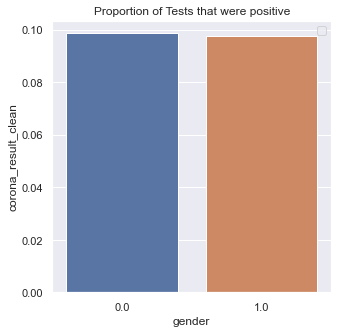

In [62]:
#define figure size
sns.set(rc={"figure.figsize":(5, 5)})
sns.barplot(data = grouped_by_gender_results, x = 'gender', y ='corona_result_clean')
#plt.axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
plt.title('Proportion of Tests that were positive')
plt.legend()

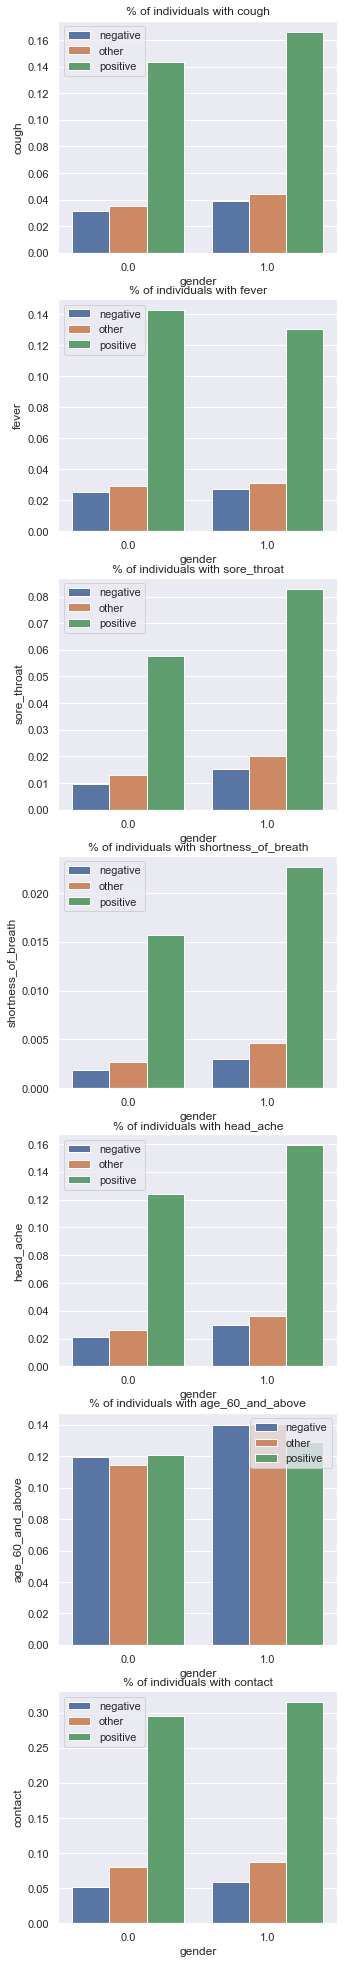

In [63]:
feature_list = [
    'cough',
    'fever',	
    'sore_throat',
    'shortness_of_breath',	
    'head_ache',
    'age_60_and_above',
    #'gender',
    'contact'
]

fig, ax = plt.subplots(nrows = len(feature_list), figsize = (5, 5*len(feature_list)))

for i, feature in zip(range(0, len(feature_list)),feature_list):
    sns.barplot(data = grouped_by_gender_mean, x = 'gender', y = feature,  hue = 'corona_result', ax = ax[i])
    ax[i].set_title(f'% of individuals with {feature}')
    ax[i].legend()

# Graphs of age and result

In [45]:
grouped_by_age_count = covid_0220_df.groupby(['age_60_and_above', 'corona_result']).count().reset_index()
grouped_by_age_mean = covid_0220_df.groupby(['age_60_and_above', 'corona_result']).mean().reset_index()
grouped_by_age_results = covid_0220_df.groupby(['age_60_and_above']).mean().reset_index()

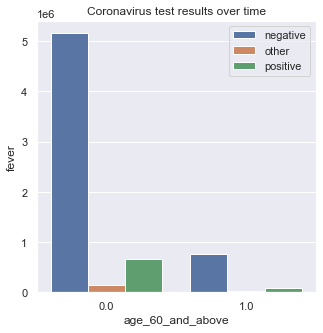

In [64]:
#define figure size
sns.set(rc={"figure.figsize":(5, 5)})
sns.barplot(data = grouped_by_age_count, x = 'age_60_and_above', y ='fever',  hue = 'corona_result')
plt.title('Coronavirus test results over time')
plt.legend()

No handles with labels found to put in legend.


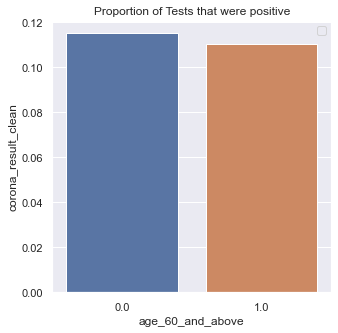

In [65]:
#define figure size
sns.set(rc={"figure.figsize":(5, 5)})
sns.barplot(data = grouped_by_age_results, x = 'age_60_and_above', y ='corona_result_clean')
#plt.axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
plt.title('Proportion of Tests that were positive')
plt.legend()

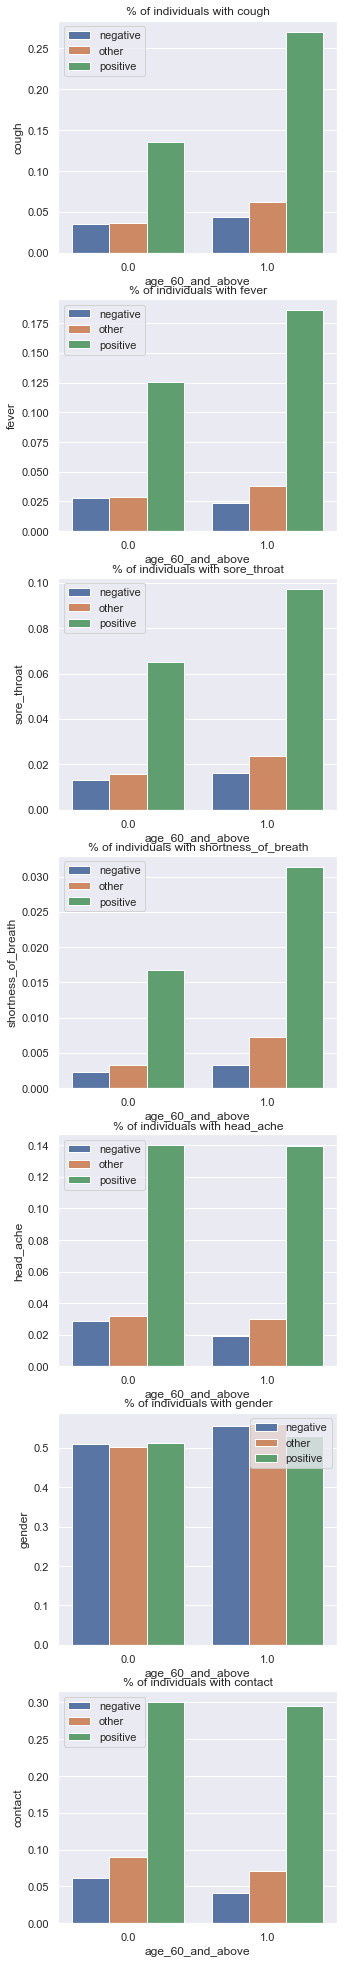

In [66]:
feature_list = [
    'cough',
    'fever',	
    'sore_throat',
    'shortness_of_breath',	
    'head_ache',
    #'age_60_and_above',
    'gender',
    'contact'
]

fig, ax = plt.subplots(nrows = len(feature_list), figsize = (5, 5*len(feature_list)))

for i, feature in zip(range(0, len(feature_list)),feature_list):
    sns.barplot(data = grouped_by_age_mean, x = 'age_60_and_above', y = feature,  hue = 'corona_result', ax = ax[i])
    ax[i].set_title(f'% of individuals with {feature}')
    ax[i].legend()

# Graphs comparing Original Study Period to Currently Available Data

In [55]:
covid_0220_df['in_study'] = 0
covid_0220_df.loc[(covid_0220_df['test_date'] >= '2020-03-22') & (covid_0220_df['test_date'] < '2020-04-08'), 'in_study'] = 1

In [56]:
grouped_by_study_count = covid_0220_df.groupby(['in_study', 'corona_result']).count().reset_index()
grouped_by_study_mean = covid_0220_df.groupby(['in_study', 'corona_result']).mean().reset_index()
grouped_by_study_results = covid_0220_df.groupby(['in_study']).mean().reset_index()

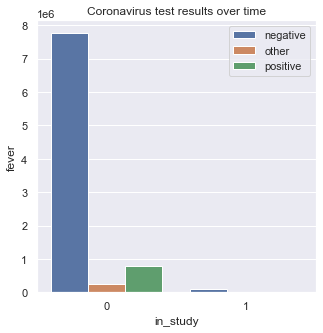

In [67]:
#define figure size
sns.set(rc={"figure.figsize":(5, 5)})
sns.barplot(data = grouped_by_study_count, x = 'in_study', y ='fever',  hue = 'corona_result')
plt.title('Coronavirus test results over time')
plt.legend()

No handles with labels found to put in legend.


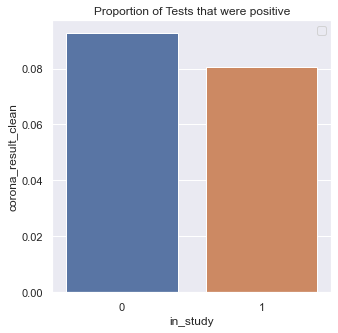

In [68]:
#define figure size
sns.set(rc={"figure.figsize":(5, 5)})
sns.barplot(data = grouped_by_study_results, x = 'in_study', y ='corona_result_clean')
#plt.axvspan('2020-03-22', '2020-04-07', color='grey', alpha=0.3, hatch = 'x', label = 'Date Range used in COVID Study')
plt.title('Proportion of Tests that were positive')
plt.legend()

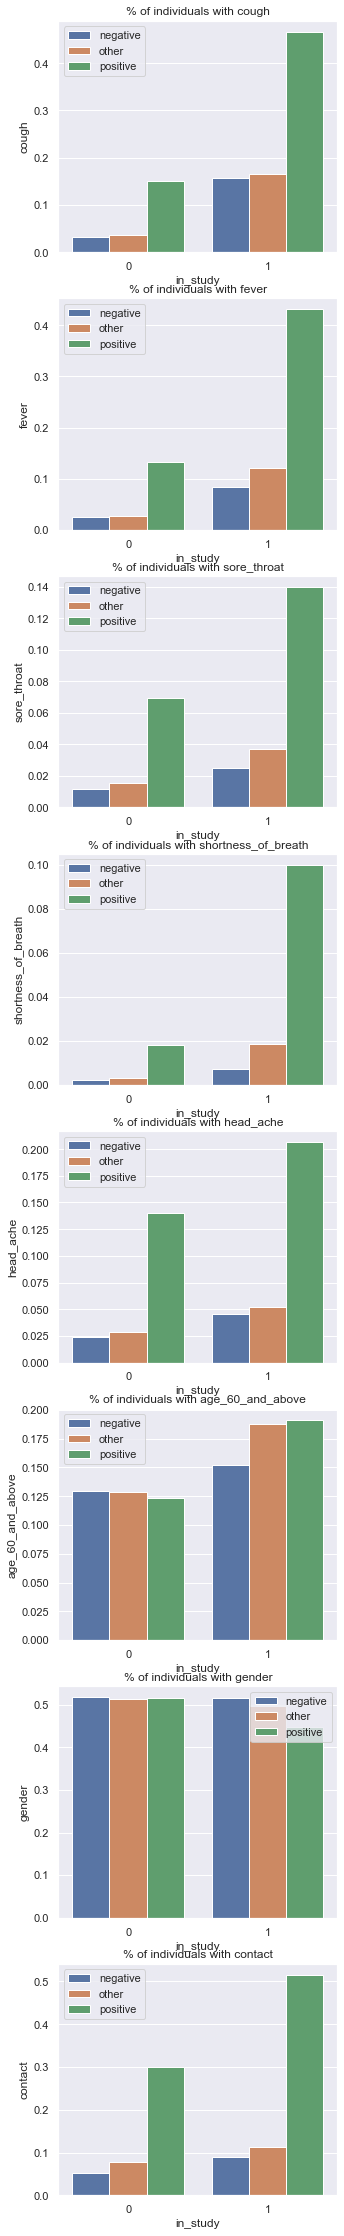

In [69]:
feature_list = [
    'cough',
    'fever',	
    'sore_throat',
    'shortness_of_breath',	
    'head_ache',
    'age_60_and_above',
    'gender',
    'contact'
]

fig, ax = plt.subplots(nrows = len(feature_list), figsize = (5, 5*len(feature_list)))

for i, feature in zip(range(0, len(feature_list)),feature_list):
    sns.barplot(data = grouped_by_study_mean, x = 'in_study', y = feature,  hue = 'corona_result', ax = ax[i])
    ax[i].set_title(f'% of individuals with {feature}')
    ax[i].legend()

# Take away points from these graphs!
- Men were less likely to report than women (And to be less likely to have symptoms)
    - THEY WERE EQUALLY LIKELY TO TEST POSITIVE THOUGH
- People over the age of 60 were more likely to have any symptom (Other than headaches!)
- Contact with a confirmed case is the greatest indicator of testing positive
- Data is highly seasonal in not just amount of tests taken but % of positive cases, these correspond to Israeli national holiday passover.
- Data used within the study had stronger indicators of Coronavirus, with all symptoms appearing with a far greater proportion there than over the remaining span of data.